<a href="https://colab.research.google.com/github/PavelStelmakhV/hw310-keras-fasion-mnist/blob/main/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras import regularizers
from keras import callbacks
from keras import initializers
from keras.layers import BatchNormalization
from keras.models import load_model

In [201]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [202]:
# x_train = x_train.reshape(60000, 784).astype('float32') / 255
# x_test = x_test.reshape(10000, 784).astype('float32') / 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Перемешаем тренировочные данные
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [203]:
# x_val = x_train[-10000:]
# y_val = y_train[-10000:]
# x_train = x_train[:-10000]
# y_train = y_train[:-10000]

In [204]:
w_init_tanh = initializers.glorot_normal(seed=42)
w_init_relu = initializers.HeNormal(seed=42)
b_init = initializers.Zeros()

In [205]:
model = tf.keras.Sequential()

drop_out = 0.40
lern_rat = 0.001
neurons = 256

model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dropout(drop_out))

model.add(BatchNormalization())
model.add(layers.Dense(neurons * 1,
                       activation='relu',
                       kernel_initializer=w_init_relu,
                       bias_initializer=b_init)) #, kernel_regularizer=regularizers.l2(lern_rat)
model.add(layers.Dropout(drop_out))

# model.add(BatchNormalization())
# model.add(layers.Dense(neurons * 1,
#                        activation='relu',
#                        kernel_initializer=w_init_relu,
#                        bias_initializer=b_init)) #, kernel_regularizer=regularizers.l2(lern_rat)
# model.add(layers.Dropout(drop_out))

# model.add(BatchNormalization())
# model.add(layers.Dense(neurons * 1,
#                        activation='relu',
#                        kernel_initializer=w_init_relu,
#                        bias_initializer=b_init)) #, kernel_regularizer=regularizers.l2(lern_rat)
# model.add(layers.Dropout(drop_out))

model.add(BatchNormalization())
model.add(layers.Dense(neurons * 2,
                       activation='relu',
                       kernel_initializer=w_init_relu,
                       bias_initializer=b_init)) #, kernel_regularizer=regularizers.l2(lern_rat)
model.add(layers.Dropout(drop_out))

# model.add(BatchNormalization())
# model.add(layers.Dense(neurons * 2,
#                        activation='tanh',
#                        kernel_initializer=w_init_tanh,
#                        bias_initializer=b_init))
# model.add(layers.Dropout(drop_out))

model.add(BatchNormalization())
model.add(layers.Dense(neurons * 2,
                       activation='relu',
                       kernel_initializer=w_init_relu,
                       bias_initializer=b_init))
model.add(layers.Dropout(drop_out))

# model.add(layers.Dense(neurons * 2, activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.Dropout(drop_out * 2))

model.add(layers.Dense(10, activation='softmax'))

In [206]:
model.compile(#optimizer='adam',
              # optimizer='adamax',
              optimizer='nadam',
              # optimizer='rmsprop',
              # optimizer='sgd',
              # optimizer='adadelta',
              # loss='binary_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy']) # sparse_categorical_accuracy

1/1 [==============================] - 0s 99ms/step


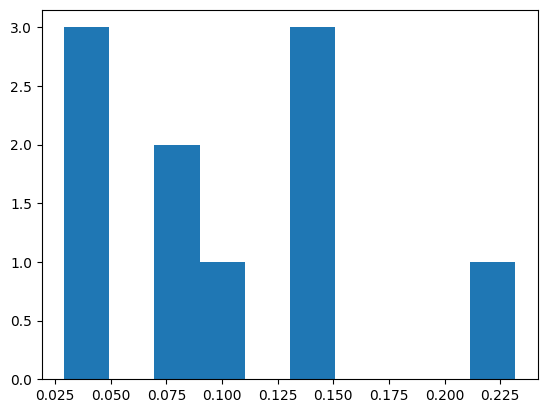

In [207]:
x = np.random.random((1, 28, 28))
a = model.predict(x)
_ = plt.hist(np.transpose(a))

In [208]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [209]:
callback = callbacks.EarlyStopping(monitor='val_loss',
                                   patience=50,
                                   restore_best_weights=True,
                                   )
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = callbacks.ModelCheckpoint('best_model.h5', monitor='sparse_categorical_accuracy', mode='max', verbose=0, save_best_only=True)


In [210]:
# model.fit(train_images, train_labels, epochs=20)
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=128,
                    # callbacks=[callback],
                    callbacks=[mc],
                    verbose=1, #многословие
                    validation_split=0.2
                    # validation_data=(x_val, y_val)
                    )
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/40
375/375 [==============================] - 6s 7ms/step - loss: 0.9378 - sparse_categorical_accuracy: 0.6735 - val_loss: 0.5091 - val_sparse_categorical_accuracy: 0.8094
Epoch 2/40
375/375 [==============================] - 2s 6ms/step - loss: 0.6224 - sparse_categorical_accuracy: 0.7720 - val_loss: 0.4489 - val_sparse_categorical_accuracy: 0.8295
Epoch 3/40
375/375 [==============================] - 2s 6ms/step - loss: 0.5608 - sparse_categorical_accuracy: 0.7937 - val_loss: 0.4137 - val_sparse_categorical_accuracy: 0.8482
Epoch 4/40
375/375 [==============================] - 3s 7ms/step - loss: 0.5252 - sparse_categorical_accuracy: 0.8064 - val_loss: 0.4037 - val_sparse_categorical_accuracy: 0.8506
Epoch 5/40
375/375 [==============================] - 3s 7ms/step - loss: 0.5021 - sparse_categorical_accuracy: 0.8125 - val_loss: 0.3824 - val_sparse_categorical_accuracy: 0.8595
Epoch 6/40
375/375 [==============================] - 2s 7ms/step - loss: 0.4842 - sparse_categorica

In [211]:
print('\nhistory dict:', list(history.history.keys()))


history dict: ['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy']


In [212]:
result = model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 1s 3ms/step - loss: 0.3275 - sparse_categorical_accuracy: 0.8798
[0.32748278975486755, 0.879800021648407]


In [213]:
saved_model = load_model('best_model.h5')
result = saved_model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 1s 3ms/step - loss: 0.3276 - sparse_categorical_accuracy: 0.8793
[0.3276306986808777, 0.8792999982833862]


In [214]:
# from keras.models import load_model
# saved_model = load_model('best_model.h5')
# # _, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
# _, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
# print('Test: %.3f' % (test_acc))

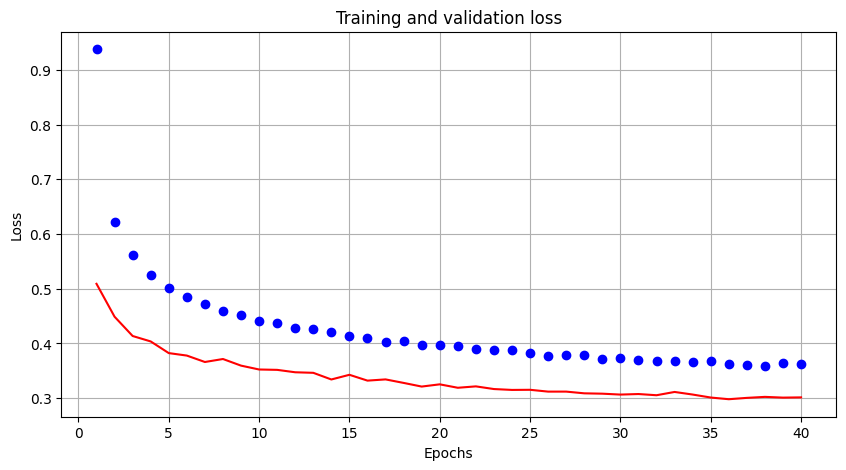

<Figure size 640x480 with 0 Axes>

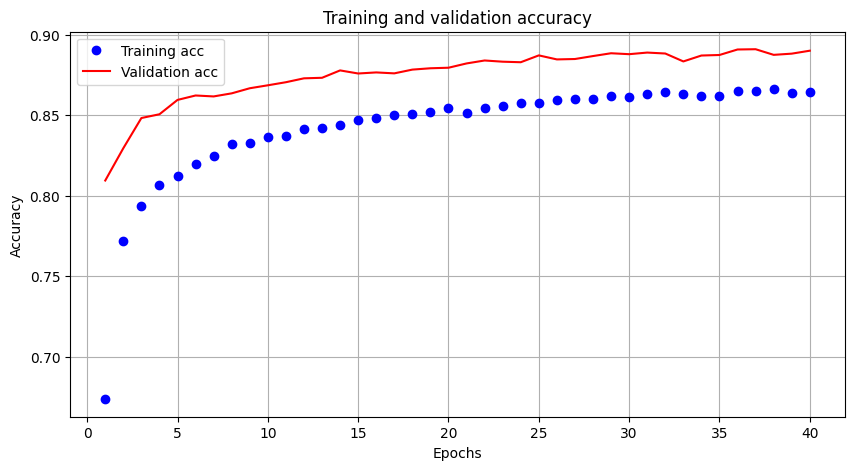

In [215]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
# plt.ylim (0.2, 0.5)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.legend()
plt.grid(True)
plt.show()
1
plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['sparse_categorical_accuracy']
plt.plot(epochs, history_dict['sparse_categorical_accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_sparse_categorical_accuracy'], 'r', label='Validation acc')
# plt.ylim (0.80, 0.94)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [216]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [217]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [218]:
predictions[0]

array([0.08725065, 0.08725078, 0.08725066, 0.08725073, 0.08725072,
       0.08819523, 0.08725068, 0.10376807, 0.08725139, 0.19728106],
      dtype=float32)

In [219]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dropout_51 (Dropout)        (None, 784)               0         
                                                                 
 batch_normalization_41 (Ba  (None, 784)               3136      
 tchNormalization)                                               
                                                                 
 dense_51 (Dense)            (None, 256)               200960    
                                                                 
 dropout_52 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_42 (Ba  (None, 256)               1024      
 tchNormalization)                                   